## Bootstrap

**In a nutshell**: Bootstrapping helps estimation of statisc values (e.g. mean, median) of a large population by repeatedly drawing random samples from sample pupolation and calculate the desired statisc value. When a sample is drawn from the sample population, it must be replaced (Sample with Replacement). For example, a set of sample data contains `[2, 5, 7, 8, 9]`, after we draw 8 from the data, sample data must maintain the original shape `[2, 5, 7, 8, 9]`.

In [1]:
# Libraries for processing arrays faster
import numpy as np
import pandas as pd
# Libraries for drawing graph
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./brain_weight.csv')

In [3]:
df.shape

(237, 4)

In [4]:
pd.options.display.max_columns = None

In [5]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


Gender: 1 represents male, 2 represents female  
Age Range: 1 represents > 18 years of age, 2 represents < 18 years of age  
Head Size(cm^3): Volume in cubic centimeters  
Brain Weight(grams): Mass of brains in grams  

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


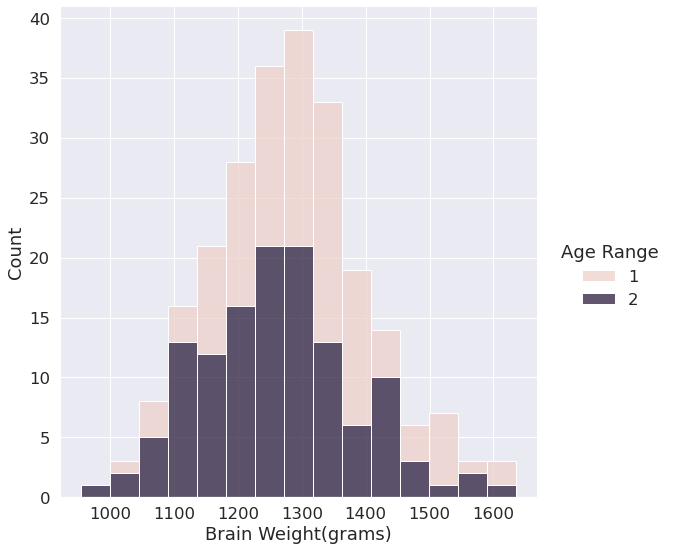

In [16]:
sns.set(font_scale=1.5)
sns.displot(data=df, x='Brain Weight(grams)', height=8, hue='Age Range', multiple='stack')

<AxesSubplot:xlabel='Brain Weight(grams)', ylabel='Head Size(cm^3)'>

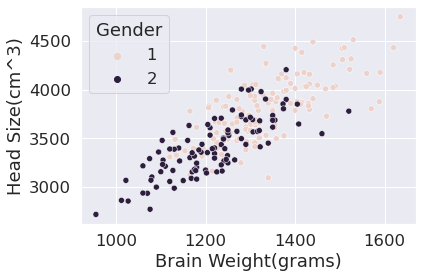

In [18]:
sns.scatterplot(data=df, x='Brain Weight(grams)', y='Head Size(cm^3)', hue="Gender")

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,237.0,1.434599,0.496753,1.0,1.0,1.0,2.0,2.0
Age Range,237.0,1.535865,0.499768,1.0,1.0,2.0,2.0,2.0
Head Size(cm^3),237.0,3633.991561,365.261422,2720.0,3389.0,3614.0,3876.0,4747.0
Brain Weight(grams),237.0,1282.873418,120.340446,955.0,1207.0,1280.0,1350.0,1635.0


## Beginning of Bootstrap

In [20]:
bootstrap_sample = df.sample(38, replace=True)

In [23]:
n_iterations = 3000
n_size = len(bootstrap_sample)
sampling_means_distribution = []
# Run the loop 3000 times, draw random samples in each loop and get there mean
for i in range(n_iterations):
    iteration_sample = bootstrap_sample.sample(n_size, replace=True)
    iteration_mean = iteration_sample['Brain Weight(grams)'].mean()
    sampling_means_distribution.append(iteration_mean)

Confidence Interval  
lower_percentile = mean - z score x (standard deviation / √sample size)  
upper_percentile = mean + z score x (standard deviation / √sample size)  

In [30]:
sample_lower, sample_upper = np.percentile(sampling_means_distribution, [2.5, 97.5])

In [31]:
true_lower, true_upper = np.percentile(df[], [2.5, 97.5])

In [32]:
print('95%% confidence interval for bootstrap: [%.2f, %.2f]' % (sample_lower, sample_upper))
print('95%% confidence interval for entire population: [%.2f, %.2f]' % (true_lower, true_upper))

95% confidence interval for bootstrap: [1290.56, 1361.32]
95% confidence interval for entire population: [1.00, 4116.27]
